# MAT281 - Tarea 2

**Indicaciones**:

* En los **Ejercicio 1-8** puedes utilizar tanto `matplotlib` como `altair` según te parezca más conveniente o cómodo, en ambos casos cada gráfico debe tener elementos mínimos como:
    - Título
    - Nombre de los ejes, leyendas, etc. en formato _amigable_/_humano_, por ejemplo, si la columna del dataframe en cuestión tiene por nombre `casos_confirmados` se espera que el eje del gráfico tenga por nombre `Casos confirmados`.
    - Colores adecuados al tipo de datos.
    - Un tamaño adecuado para ver con facilidad en una pantalla con resolución HD o FullHD.
    - Cada vez que no se cumplan alguna de estos requerimientos se descontará __1 punto__ de la nota final.

* Para el **Ejercicio 9** es obligación utilizar `altair`.
* Cada ejercicio debe estar acompañado con una celda con comentarios o análisis que puedas desprender de los gráficos.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import altair as alt
import ipywidgets as widgets
import matplotlib.dates as dates

from datetime import date
from ipywidgets import interactive, interact

pd.set_option('display.max_columns', 999)
alt.data_transformers.enable('data_server')
alt.themes.enable('opaque')

%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 12

**COVID-19 en Chile** 

En esta tarea exploraremos los datos de Covid-19 en Chile a profundidad. Las siguientes celdas cargarán los datos a utilizar en tu sesión. Es importante que leas la documentación de cada conjunto de datos para comprender las columnas.

In [2]:
start_date = pd.to_datetime("2020-04-13")

In [3]:
# https://github.com/MinCiencia/Datos-COVID19/tree/master/output/producto6
confirmados = (
    pd.read_csv("https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto6/bulk/data.csv")
    .rename(columns=lambda x: x.lower().replace(" ", "_"))
    .assign(fecha=lambda x: pd.to_datetime(x["fecha"]))
    .loc[lambda x: x["fecha"] >= start_date]
    .dropna()
    .astype({"casos_confirmados": np.float, "tasa": np.float})
)

confirmados.head()

,poblacion,casos_confirmados,fecha,region_id,region,provincia_id,provincia,comuna_id,comuna,tasa
0,247552.0,270.0,2020-04-27,15.0,Arica y Parinacota,151.0,Arica,15101.0,Arica,109.067994
1,247552.0,9138.0,2020-10-12,15.0,Arica y Parinacota,151.0,Arica,15101.0,Arica,3691.345657
2,247552.0,596.0,2020-05-29,15.0,Arica y Parinacota,151.0,Arica,15101.0,Arica,240.757497
3,247552.0,6131.0,2020-08-17,15.0,Arica y Parinacota,151.0,Arica,15101.0,Arica,2476.651370
4,247552.0,353.0,2020-05-11,15.0,Arica y Parinacota,151.0,Arica,15101.0,Arica,142.596303


In [4]:
# https://github.com/MinCiencia/Datos-COVID19/tree/master/output/producto19
activos = (
    pd.read_csv("https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto19/CasosActivosPorComuna.csv")
    .rename(columns=lambda x: x.lower().replace(" ", "_"))
    .loc[lambda x: x["codigo_comuna"].notnull()]
    .melt(id_vars=["region", "codigo_region", "comuna", "codigo_comuna", "poblacion"], var_name="fecha", value_name="casos_activos")
    .assign(fecha=lambda x: pd.to_datetime(x["fecha"]))
    .loc[lambda x: x["fecha"] >= start_date]
)

activos.head()

,region,codigo_region,comuna,codigo_comuna,poblacion,fecha,casos_activos
0,Arica y Parinacota,15,Arica,15101.0,247552.0,2020-04-13,88.0
1,Arica y Parinacota,15,Camarones,15102.0,1233.0,2020-04-13,0.0
2,Arica y Parinacota,15,General Lagos,15202.0,810.0,2020-04-13,0.0
3,Arica y Parinacota,15,Putre,15201.0,2515.0,2020-04-13,0.0
4,Tarapaca,1,Alto Hospicio,1107.0,129999.0,2020-04-13,8.0


In [5]:
# https://github.com/MinCiencia/Datos-COVID19/tree/master/output/producto14
fallecidos = (
    pd.read_csv("https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto14/FallecidosCumulativo.csv")
    .rename(columns=lambda x: x.lower().replace(" ", "_"))
    .melt(id_vars=["region"], var_name="fecha", value_name="fallecidos")
    .assign(
        fecha=lambda x: pd.to_datetime(x["fecha"]),
    )
    .loc[lambda x: x["fecha"] >= start_date]
)

fallecidos.head()

,region,fecha,fallecidos
374,Arica y Parinacota,2020-04-13,1.0
375,Tarapacá,2020-04-13,0.0
376,Antofagasta,2020-04-13,1.0
377,Atacama,2020-04-13,0.0
378,Coquimbo,2020-04-13,0.0


In [6]:
# https://github.com/MinCiencia/Datos-COVID19/tree/master/output/producto10
fallecidos_etareo = (
    pd.read_csv("https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto10/FallecidosEtario.csv")
    .rename(columns=lambda x: x.lower().replace(" ", "_"))
    .melt(id_vars=["grupo_de_edad"], var_name="fecha", value_name="fallecidos")
    .assign(
        fecha=lambda x: pd.to_datetime(x["fecha"]),
        grupo_de_edad=lambda x: x["grupo_de_edad"].str.replace("<=39", "0-39")
    )
    .loc[lambda x: x["fecha"] >= start_date]
)

fallecidos_etareo.tail()

,grupo_de_edad,fecha,fallecidos
1661,50-59,2020-12-02,1547
1662,60-69,2020-12-02,3258
1663,70-79,2020-12-02,4339
1664,80-89,2020-12-02,3991
1665,>=90,2020-12-02,1434


## Ejercicio 1

(10 puntos)

Mostrar cantidad de fallecidos a la fecha por cada grupo etáreo.

In [7]:
now = pd.to_datetime(max(fallecidos_etareo['fecha'].values))

hoy = now.strftime("%Y-%m-%d")

print(f"La fecha de actualización es: \n{hoy}\n")

La fecha de actualización es: 
2020-12-02



In [8]:
graf1 = fallecidos_etareo.loc[lambda s: s['fecha'] == pd.to_datetime(hoy)]

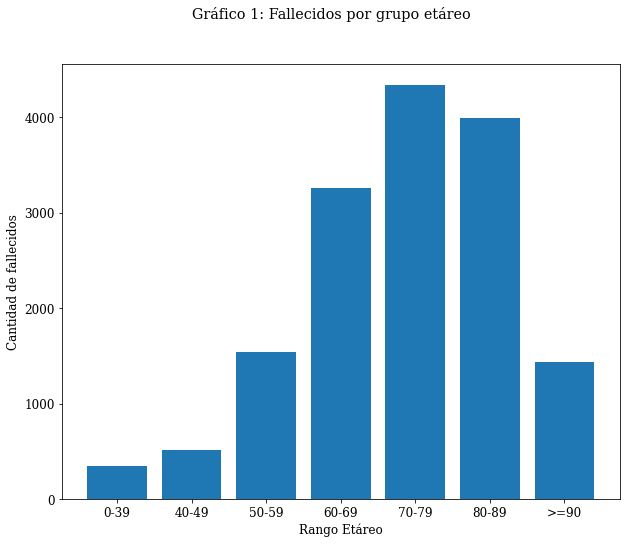

In [9]:
x = graf1['grupo_de_edad'].values
y = graf1['fallecidos'].values

fig = plt.figure(figsize=(10,8))
fig.suptitle('Gráfico 1: Fallecidos por grupo etáreo')
ax = fig.add_subplot()
ax.bar(x,y);
ax.set_xlabel('Rango Etáreo');
ax.set_ylabel('Cantidad de fallecidos');

**Comentarios:** En base al grafico se puede observar que para el grupo de 70 a 79 años hay una mayor cantidad total de defunciones por COVID.

## Ejercicio 2

(10 puntos)

¿Qué tan variable es la población de las comunas de Chile? Considera utilizar un gráfico que resuma de buena forma la información sin agregar la variable de región o provincia.

In [10]:

bars = alt.Chart(activos, title="Gráfico 2: Variabilidad población por comunas").mark_bar().encode(
    x='poblacion:Q',
    y=alt.Y("comuna:O", sort='-x'),
    color=alt.Color('poblacion', scale=alt.Scale(scheme="spectral"), legend=alt.Legend(orient='bottom'))
)

text = bars.mark_text(
    align='left',
    baseline='middle',
    dx=3
).encode(
    text='poblacion:Q'
)

(bars + text).properties(height=4500)

alt.LayerChart(...)

**Comentarios:** Para graficar la población por comunas se utilizó un gráfico de barras, además se colocó el valor para mayor presición, dada la gran cantidad de comunas. Para graficar la variabilidad se utilizaron colores y se ordenó de manera decreciente, donde se observó que la diferencia entre la comuna con más habitantes y la con menos habitantes es de 645.772 mostrando la gran varibilidad que existe.

## Ejercicio 3

(10 puntos)

Mostrar evolución y comparación de los fallecimientos entre distintos grupos etáreos, pero que al mismo tiempo sea fácil identificar la cantidad de fallecidos total en cada fecha.

In [11]:
alt.Chart(fallecidos_etareo, title="Gráfico 3: Cantidad de fallecidos acumulada por grupo etáreo").mark_area().encode(
    x=alt.X("fecha:T", axis=alt.Axis(title='Fecha')),
    y=alt.Y("fallecidos", axis=alt.Axis(title='Número de Fallecidos')),
    color=alt.Color("grupo_de_edad:N", legend=alt.Legend(title="Grupo Etáreo"))
)

alt.Chart(...)

**Comentarios:** Se observa el gran incremento de casos a lo largo del tiempo observándose que la mayoría de los casos se concentran en los rangos de edad 60-89. Se utilizó este gráfico de áreas para poder observar al mismo tiempo la cantidad total de fallecidos y lo que aporta cada rango etareo.

## Ejercicio 4

(10 puntos)

Mostrar en tres gráficos la evolución de casos confirmados, evolución de fallecimientos y evolución de casos activos.

In [12]:
conf_tot = confirmados.groupby("fecha").agg({"casos_confirmados": "sum"})
act_tot = activos.groupby("fecha").agg({"casos_activos": "sum"})
fall_tot = fallecidos.groupby("fecha").agg({"fallecidos": "sum"})

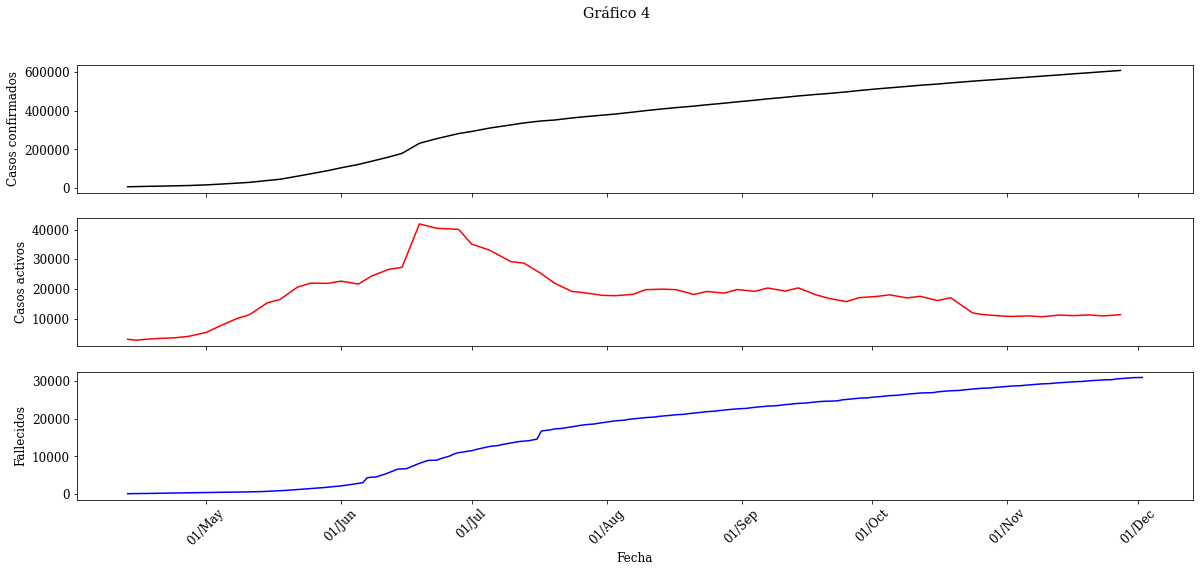

In [13]:
x1 = conf_tot.index
y1 = conf_tot['casos_confirmados'].values
x2 = act_tot.index
y2 = act_tot['casos_activos'].values
x3 = fall_tot.index
y3 = fall_tot['fallecidos'].values

ftt = dates.DateFormatter('%d/%b')

fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, figsize=(20, 8), sharex=True)
fig.suptitle('Gráfico 4')

ax1.plot(x1,y1, 'k');
ax1.set_ylabel('Casos confirmados');

ax2.plot(x2,y2, c ='r');
ax2.set_ylabel('Casos activos');
plt.setp(ax2.get_xticklabels(), rotation=45);

ax3.plot(x3,y3, 'b');
ax3.set_xlabel('Fecha');
ax3.set_ylabel('Fallecidos');
ax3.xaxis.set_major_formatter(ftt);
plt.setp(ax3.get_xticklabels(), rotation=45);

**Comentarios:** Se observa que la curva de Fallecidos y de Casos confirmados tienen una forma similar, debido que se trata de información acumulada. La curva de Casos activos tuvo un peak y después comenzó a disminuir debido a que corresponde a los casos confirmados menos los casos recuperados.

## Ejercicio 5

(10 puntos)

Comparar la tasa de incidencia entre las regiones a lo largo del tiempo.

In [14]:
def tasa_incidencia(df):
    tasa = df['casos_confirmados'].sum()*100000/(df['poblacion'].sum())
    return tasa

In [15]:
graf5 = confirmados.groupby(["region", "fecha"]).apply(tasa_incidencia).to_frame()
graf5.reset_index(inplace=True)
graf5 = graf5.rename(columns = {0:'tasa'})

In [16]:
alt.Chart(graf5, title="Gráfico 5: Tasa de incidencia por región").mark_line().encode(
    x=alt.X("fecha:T", axis=alt.Axis(title='Fecha')),
    y=alt.Y("tasa", axis=alt.Axis(title='Tasa de incidencia')),
    color=alt.Color('region', scale=alt.Scale(scheme="tableau20"), legend=alt.Legend(title="Región")),
    strokeDash='region'
)

alt.Chart(...)

**Comentarios:** El gráfico no es muy bueno, ya que son muchas las regiones. De todas formas, el gráfico es bueno para comparar la verdadera propagación del Covid por región, ya que se trata de la tasa de incidencia pudiendo comparar correctamente los contagios entre regiones.

## Ejercicio 6

(10 puntos)

¿Hay alguna conclusión que puedas obtener rápidamente al graficar un _scatter plot_ con los casos confirmados y tasa de incidencia de cada comuna para los días 13 de abril y 6 de noviembre del 2020? Además, colorea cada punto según la región a la que pertenece y considera si es útil en el gráfico que el tamaño sea proporcional a la población.

In [17]:
Apr13 = confirmados.loc[lambda x: x['fecha'] == '2020-04-13']
Nov6 = confirmados.loc[lambda x: x['fecha'] == '2020-11-06']

In [18]:
alt.Chart(Apr13, title="Gráfico 6.1: Tasa de incidencia por casos confirmados para el 13 de Abril").mark_point(opacity=0.8).encode(
    x=alt.X("casos_confirmados", axis=alt.Axis(title='Casos confirmados')),
    y=alt.Y("tasa", axis=alt.Axis(title='Tasa de incidencia')),
    color=alt.Color('region', scale=alt.Scale(scheme="tableau20"), legend=alt.Legend(title="Región")),
    size = 'poblacion'
)

alt.Chart(...)

In [19]:
alt.Chart(Nov6, title="Gráfico 6.2: Tasa de incidencia por casos confirmados para el 6 de Noviembre").mark_point(opacity=0.8).encode(
    x=alt.X("casos_confirmados", axis=alt.Axis(title='Casos confirmados')),
    y=alt.Y("tasa", axis=alt.Axis(title='Tasa de incidencia')),
    color=alt.Color('region', scale=alt.Scale(scheme="tableau20"), legend=alt.Legend(title="Región")),
    size = 'poblacion'
)

alt.Chart(...)

**Comentarios:** Sin conocer la población se puede concluir en primera instancia que en la mayoría de los casos una baja tasa de incidencia está relacionada a un bajo número de casos confirmados, además se puede observar el gran aumento de casos confirmados para la fecha 6 de noviembre en comparación con el 13 de Abril, observando un aumento tanto en la tasa como en los casos confirmados. Al momento de considerar la población, se observa más claramente que en muchas comunas, especialmente de la región metropolitana, donde hay mayor población, se tiende a mantener una tasa de incidencia más baja para más casos confirmados, además de observarse una relación directa entre la población y los casos confirmados. Otro punto a destacar es que para comunas con población muy pequeña, la tasa de incidencia es muy grande para pocos casos. Para este caso es útil el uso de la población ya que se pueden realizar comparaciones entre comunas con un número de habitantes similar.

## Ejercicio 7

(10 puntos)

1. Grafica la evolución de los casos activos de cada comuna en un solo gráfico. 
2. Grafica la evolución de los casos activos de cada comuna en gráficos separados por región.

Entrega los pros y contras de cada uno de estos enfoques.

In [20]:
alt.Chart(activos, title="Gráfico 7.1: Casos activos por comuna").mark_line().encode(
    x=alt.X("fecha", axis=alt.Axis(title='Fecha')),
    y=alt.Y("casos_activos", axis=alt.Axis(title='Casos Activos')),
    color=alt.Color('comuna', scale=alt.Scale(scheme="tableau20"), legend=alt.Legend(title="Comunas")),
    strokeDash='comuna',
    tooltip="comuna"
).interactive()

alt.Chart(...)

In [21]:
AP = activos.loc[lambda x: x['region'] == 'Arica y Parinacota']
TA = activos.loc[lambda x: x['region'] == 'Tarapaca']
AN = activos.loc[lambda x: x['region'] == 'Antofagasta']
AT = activos.loc[lambda x: x['region'] == 'Atacama']
CO = activos.loc[lambda x: x['region'] == 'Coquimbo']
VS = activos.loc[lambda x: x['region'] == 'Valparaiso']
RM = activos.loc[lambda x: x['region'] == 'Metropolitana']
LI = activos.loc[lambda x: x['region'] == 'Del Libertador General Bernardo O’Higgins']
ML = activos.loc[lambda x: x['region'] == 'Maule']
NB = activos.loc[lambda x: x['region'] == 'Nuble']
BI = activos.loc[lambda x: x['region'] == 'Biobio']
AR = activos.loc[lambda x: x['region'] == 'La Araucania']
LR = activos.loc[lambda x: x['region'] == 'Los Rios']
LL = activos.loc[lambda x: x['region'] == 'Los Lagos']
AI = activos.loc[lambda x: x['region'] == 'Aysen']
MA = activos.loc[lambda x: x['region'] == 'Magallanes y la Antartica']

In [22]:
alt.Chart(AP, title="Gráfico 7.2.1: Casos activos por comuna, región de Arica y Parinacota").mark_line().encode(
    x=alt.X("fecha", axis=alt.Axis(title='Fecha')),
    y=alt.Y("casos_activos", axis=alt.Axis(title='Casos Activos')),
    color=alt.Color('comuna', scale=alt.Scale(scheme="tableau20"), legend=alt.Legend(title="Comunas")),
    strokeDash='comuna',
    tooltip="comuna"
).interactive()

alt.Chart(...)

In [23]:
alt.Chart(TA, title="Gráfico 7.2.2: Casos activos por comuna, región de Tarapacá").mark_line().encode(
    x=alt.X("fecha", axis=alt.Axis(title='Fecha')),
    y=alt.Y("casos_activos", axis=alt.Axis(title='Casos Activos')),
    color=alt.Color('comuna', scale=alt.Scale(scheme="tableau20"), legend=alt.Legend(title="Comunas")),
    strokeDash='comuna',
    tooltip="comuna"
).interactive()

alt.Chart(...)

In [24]:
alt.Chart(AN, title="Gráfico 7.2.3: Casos activos por comuna, Región de Antofagasta").mark_line().encode(
    x=alt.X("fecha", axis=alt.Axis(title='Fecha')),
    y=alt.Y("casos_activos", axis=alt.Axis(title='Casos Activos')),
    color=alt.Color('comuna', scale=alt.Scale(scheme="tableau20"), legend=alt.Legend(title="Comunas")),
    strokeDash='comuna',
    tooltip="comuna"
).interactive()

alt.Chart(...)

In [25]:
alt.Chart(AT, title="Gráfico 7.2.4: Casos activos por comuna, Región de Atacama").mark_line().encode(
    x=alt.X("fecha", axis=alt.Axis(title='Fecha')),
    y=alt.Y("casos_activos", axis=alt.Axis(title='Casos Activos')),
    color=alt.Color('comuna', scale=alt.Scale(scheme="tableau20"), legend=alt.Legend(title="Comunas")),
    strokeDash='comuna',
    tooltip="comuna"
).interactive()

alt.Chart(...)

In [26]:
alt.Chart(CO, title="Gráfico 7.2.5: Casos activos por comuna, Región de Coquimbo").mark_line().encode(
    x=alt.X("fecha", axis=alt.Axis(title='Fecha')),
    y=alt.Y("casos_activos", axis=alt.Axis(title='Casos Activos')),
    color=alt.Color('comuna', scale=alt.Scale(scheme="tableau20"), legend=alt.Legend(title="Comunas")),
    strokeDash='comuna',
    tooltip="comuna"
).interactive()

alt.Chart(...)

In [27]:
alt.Chart(VS, title="Gráfico 7.2.6: Casos activos por comuna, Región de Valparaíso").mark_line().encode(
    x=alt.X("fecha", axis=alt.Axis(title='Fecha')),
    y=alt.Y("casos_activos", axis=alt.Axis(title='Casos Activos')),
    color=alt.Color('comuna', scale=alt.Scale(scheme="tableau20"), legend=alt.Legend(title="Comunas")),
    strokeDash='comuna',
    tooltip="comuna"
).interactive()

alt.Chart(...)

In [28]:
alt.Chart(RM, title="Gráfico 7.2.7: Casos activos por comuna, Región Metropolitana").mark_line().encode(
    x=alt.X("fecha", axis=alt.Axis(title='Fecha')),
    y=alt.Y("casos_activos", axis=alt.Axis(title='Casos Activos')),
    color=alt.Color('comuna', scale=alt.Scale(scheme="tableau20"), legend=alt.Legend(title="Comunas")),
    strokeDash='comuna',
    tooltip="comuna"
).interactive()

alt.Chart(...)

In [29]:
alt.Chart(LI, title="Gráfico 7.2.8: Casos activos por comuna, Región del Libertador General Bernardo O'Higgins").mark_line().encode(
    x=alt.X("fecha", axis=alt.Axis(title='Fecha')),
    y=alt.Y("casos_activos", axis=alt.Axis(title='Casos Activos')),
    color=alt.Color('comuna', scale=alt.Scale(scheme="tableau20"), legend=alt.Legend(title="Comunas")),
    strokeDash='comuna',
    tooltip="comuna"
).interactive()

alt.Chart(...)

In [30]:
alt.Chart(ML, title="Gráfico 7.2.9: Casos activos por comuna, Región del Maule").mark_line().encode(
    x=alt.X("fecha", axis=alt.Axis(title='Fecha')),
    y=alt.Y("casos_activos", axis=alt.Axis(title='Casos Activos')),
    color=alt.Color('comuna', scale=alt.Scale(scheme="tableau20"), legend=alt.Legend(title="Comunas")),
    strokeDash='comuna',
    tooltip="comuna"
).interactive()

alt.Chart(...)

In [31]:
alt.Chart(NB, title="Gráfico 7.2.10: Casos activos por comuna, Región del Ñuble").mark_line().encode(
    x=alt.X("fecha", axis=alt.Axis(title='Fecha')),
    y=alt.Y("casos_activos", axis=alt.Axis(title='Casos Activos')),
    color=alt.Color('comuna', scale=alt.Scale(scheme="tableau20"), legend=alt.Legend(title="Comunas")),
    strokeDash='comuna',
    tooltip="comuna"
).interactive()

alt.Chart(...)

In [32]:
alt.Chart(BI, title="Gráfico 7.2.11: Casos activos por comuna, Región del Biobio").mark_line().encode(
    x=alt.X("fecha", axis=alt.Axis(title='Fecha')),
    y=alt.Y("casos_activos", axis=alt.Axis(title='Casos Activos')),
    color=alt.Color('comuna', scale=alt.Scale(scheme="tableau20"), legend=alt.Legend(title="Comunas")),
    strokeDash='comuna',
    tooltip="comuna"
).interactive()

alt.Chart(...)

In [33]:
alt.Chart(AR, title="Gráfico 7.2.12: Casos activos por comuna").mark_line().encode(
    x=alt.X("fecha", axis=alt.Axis(title='Fecha')),
    y=alt.Y("casos_activos", axis=alt.Axis(title='Casos Activos')),
    color=alt.Color('comuna', scale=alt.Scale(scheme="tableau20"), legend=alt.Legend(title="Comunas")),
    strokeDash='comuna',
    tooltip="comuna"
).interactive()

alt.Chart(...)

In [34]:
alt.Chart(LR, title="Gráfico 7.2.13: Casos activos por comuna, Región de Los Ríos").mark_line().encode(
    x=alt.X("fecha", axis=alt.Axis(title='Fecha')),
    y=alt.Y("casos_activos", axis=alt.Axis(title='Casos Activos')),
    color=alt.Color('comuna', scale=alt.Scale(scheme="tableau20"), legend=alt.Legend(title="Comunas")),
    strokeDash='comuna',
    tooltip="comuna"
).interactive()

alt.Chart(...)

In [35]:
alt.Chart(LL, title="Gráfico 7.2.14: Casos activos por comuna, Región de Los Lagos").mark_line().encode(
    x=alt.X("fecha", axis=alt.Axis(title='Fecha')),
    y=alt.Y("casos_activos", axis=alt.Axis(title='Casos Activos')),
    color=alt.Color('comuna', scale=alt.Scale(scheme="tableau20"), legend=alt.Legend(title="Comunas")),
    strokeDash='comuna',
    tooltip="comuna"
).interactive()

alt.Chart(...)

In [36]:
alt.Chart(AI, title="Gráfico 7.2.15: Casos activos por comuna, Región de Aysén").mark_line().encode(
    x=alt.X("fecha", axis=alt.Axis(title='Fecha')),
    y=alt.Y("casos_activos", axis=alt.Axis(title='Casos Activos')),
    color=alt.Color('comuna', scale=alt.Scale(scheme="tableau20"), legend=alt.Legend(title="Comunas")),
    strokeDash='comuna',
    tooltip="comuna"
).interactive()

alt.Chart(...)

In [37]:
alt.Chart(MA, title="Gráfico 7.2.16: Casos activos por comuna, Región de Magallanes y la Antártica").mark_line().encode(
    x=alt.X("fecha", axis=alt.Axis(title='Fecha')),
    y=alt.Y("casos_activos", axis=alt.Axis(title='Casos Activos')),
    color=alt.Color('comuna', scale=alt.Scale(scheme="tableau20"), legend=alt.Legend(title="Comunas")),
    strokeDash='comuna',
    tooltip="comuna"
).interactive()

alt.Chart(...)

**Comentarios:** El gráfico mostrando todas las comunas de chile tiene muchas desventajas, partiendo porque solo se alcanzan a observar las comunas con un mayor número de casos activos, ya que al ser tantas comunas se sobreponen muchas en un mismo lugar prvocando que el gráfico sea poco legible. A pesar de esto, este gráfico es útil para observar rápidamente las comunas más afectadas por el covid en ciertas fechas y compararlas entre ellas, ya que se logran observar peaks de contagios en la comunas con más habitantes.

Los gráficos por región tienen la ventaja que se puede observar de forma más clara la diferencia en contagios entre cada comuna, pero tienen como desventaja que son muchos, por lo que requieren más tiempo para analizarlos, además no comparan globalmente las comunas más importantes como lo hace el primero. Por otro lado, en algunos casos las comunas con pocos habitantes se pierden al lado de las de muchos, no permitiendo ver como evoluciona el covid en algunos casos.

Se recomienda crear gráficos de acuerdo a rangos de población por comunas, de forma que se puedan comparar entre casos similares los contagios activos de las comunas.

## Ejercicio 8

(10 puntos)

Hacer un gráfico que permita comparar rápidamente entre regiones su promedio de casos activos , máximo de casos confirmados y fallecidos. Utiliza los valores reales y apoyarlos con colores.

Se adjunta el diccionario `region_names` con tal de reemplazar los nombres de las regiones en los datos `fallecidos` para poder unir con los otros datos. 

In [38]:
region_names = {
    "Araucanía": "La Araucanía",
    "Aysén": "Aysén del General Carlos Ibáñez del Campo",
    "Magallanes": "Magallanes y de la Antártica Chilena",
    "Metropolitana": "Metropolitana de Santiago",
    "O’Higgins": "Libertador General Bernardo O'Higgins",
}

In [39]:
confirmados['region_id'] = confirmados['region_id'].astype(int)

In [40]:
conf_max = confirmados.groupby("region").agg(max_casos_confirmados=("casos_confirmados", "max"))
act_mean = activos.groupby("codigo_region").agg(mean_activos=("casos_activos", "mean"))
fall_max = fallecidos.groupby("region").agg(fallecidos_max=("fallecidos", "max"))

In [41]:
reg = confirmados[['region', 'region_id']].drop_duplicates()

In [42]:
compar = (
    fall_max.rename(index=region_names)
    .merge(
        conf_max,
        how="inner",
        on="region"
    )
    .merge(
        reg,
        how="left",
        on="region"
    )
    .merge(
        act_mean.rename(columns={'codigo_region':'region_id'}),
        how="left",
        left_on="region_id",
        right_index=True
    )
).drop(columns="region_id")

compar = compar.replace({
    "Aysén del General Carlos Ibáñez del Campo": "Aysén",
    "Magallanes y de la Antártica Chilena": "Magallanes",
    "Metropolitana de Santiago": "Metropolitana",
    "Libertador General Bernardo O'Higgins": "O'Higgins",
}).rename(columns={'region':'Región','fallecidos_max':'Máximo de fallecidos', 'max_casos_confirmados':'Máximo de confirmados', 'mean_activos':'Promedio de Activos'})

compar

,Región,Máximo de fallecidos,Máximo de confirmados,Promedio de Activos
0,Antofagasta,562.0,12831.0,78.112795
1,La Araucanía,229.0,5836.0,16.421402
2,Arica y Parinacota,207.0,10530.0,100.310606
3,Atacama,106.0,4820.0,33.713805
4,Aysén,14.0,1086.0,4.406061
5,Biobío,610.0,6401.0,46.290174
6,Coquimbo,270.0,5099.0,33.002020
7,Los Lagos,203.0,7812.0,24.295455
8,Los Ríos,55.0,2940.0,17.915404
9,Magallanes,195.0,12703.0,47.902204


In [43]:
alt.Chart(compar.melt('Región'), title="Gráfico 8: Comparación entre regiones de algunas variables").mark_bar().encode(
    alt.X('variable:N', axis=alt.Axis(title='', grid=True, labels=False)),
    alt.Y('value:Q', axis=alt.Axis(title='Cantidad', grid=True)),
    color=alt.Color('variable:N', legend=alt.Legend(title="Variables")),
    column='Región:O'
).configure_view(
    stroke='transparent'
)

alt.Chart(...)

**Comentarios:** Se utilizó un gráfico de barras para comparar 3 variables por región y así tener claramente distribuída la información por columnas. Se observa que el máximo de casos confirmados y fallecidos corresponden la la región metropolitana, donde existe mayor población a diferencia de las otras regiones. De todas formas se observa que en la región de Magallanes los contagiados son un número bastante alto para la población que tienen en la región. El promedio de casos activos es un valor muy pequeño en comparación a los demás, por lo que es dificil realizar observar este valor, pero dado que se debían ocupar los valores reales, es lo mejor que se puede usar para comparar.

## Ejercicio 9


En este ejercicio buscaremos realizar un mini-dashboard respecto al estado de los casos de COVID-19 en Chile, por lo tanto utilizaremos haremos uso de datos geográficos de manera operacional (es decir, no nos preocuparemos de proyecciones en mapas ni nada por el estilo), lo único es que debes instalar `geopandas` en tu ambiente virtual y no olvidar actualizarlo en tu `environment.yml` para luego subirlo a tu repositorio de GitHub.

Con tu ambiente activo (`conda activate mat281`) basta con ejecutar `conda install -c conda-forge geopandas` para instalar `geopandas`.

In [44]:
import geopandas as gpd
from pathlib import Path

In [45]:
shp_filepath = Path().resolve().parent / "data" / "regiones_chile.shp"
regiones = gpd.read_file(shp_filepath)
regiones.head()

,Region,objectid,cir_sena,codregion,area_km,st_area_sh,st_length_,geometry
0,Región Metropolitana de Santiago,1092,7,13,15392.030737,2.225204e+10,1.064253e+06,"POLYGON ((-7873736.745 -3885505.642, -7873695...."
1,Región de Antofagasta,1086,3,2,126071.431981,1.508452e+11,2.516112e+06,"MULTIPOLYGON (((-7874671.129 -2977676.850, -78..."
2,Región de Arica y Parinacota,1084,1,15,16866.819844,1.886869e+10,7.505296e+05,"POLYGON ((-7727277.278 -1997230.768, -7726464...."
3,Región de Atacama,1089,4,3,75661.248635,9.643906e+10,2.401741e+06,"MULTIPOLYGON (((-7900342.628 -3153340.296, -79..."
4,Región de Aysén del Gral.Ibañez del Campo,1088,14,11,106703.377369,2.242743e+11,4.144481e+07,"MULTIPOLYGON (((-8208500.834 -5733817.475, -82..."


In [46]:
type(regiones)

geopandas.geodataframe.GeoDataFrame

Lo único que tienes que saber es que un `GeoDataFrame` es idéntico a un `DataFrame` salvo que debe poseer una columna llamada `geometry` caracterice los elementros geométricos, que en este casos son polígonos con los límites de las regiones de Chile. 

Para graficar mapas en Altair se debe usar `mark_geoshape`, además, para no preocuparnos de las proyecciones si o si debes declarar lo siguiente que se muestra en la siguiente celda en las propiedades del gráfico. El resto es igual a cualquier otro gráfico de Altair.

In [47]:
alt.Chart(regiones).mark_geoshape().encode(
).properties(
    projection={'type': 'identity', 'reflectY': True},
    width=250,
    height=600
)

alt.Chart(...)

### Ejercicio 9.1

(10 puntos)

Define el `DataFrame` con el nombre `casos_geo` tal que tenga las columnas

* `region`
* `codigo_region`
* `fecha`
* `poblacion`
* `casos_confirmados`
* `tasa`
* `casos_activos`
* `fallecidos`
* `geometry`

Ten mucho cuidado como unes los dataframes `confirmados`, `activos`, `fallecidos` y `regiones`. Idealmente utilizar el código de región, pero en caso que no se encuentren disponibles utilizar el nombre de la región (no olivdar utilizar el diccionario `region_names`).

In [48]:
conf_reg = (
    confirmados.groupby(["region", "fecha"])
    .agg(
        poblacion=("poblacion", "sum"),
        casos_confirmados=("casos_confirmados", "sum")
    )
).reset_index()

In [49]:
act_reg = (
    activos.groupby(["codigo_region", "fecha"])
    .agg(
        casos_activos=("casos_activos", "sum")
    )
).reset_index()

In [50]:
regiones2 = regiones.rename(columns={'codregion':'codigo_region'}).drop(['Region', 'objectid','cir_sena','area_km','st_area_sh','st_length_'], axis=1)

In [51]:
casos_geo = (
    fallecidos.replace(region_names)
    .merge(
        conf_reg,
        how="left",
        on=["region", "fecha"])
    ).merge(
        reg,
        how="left",
        on="region"
    ).merge(
        graf5,
        how="left",
        on=["region", "fecha"]
    ).rename(columns={'region_id':'codigo_region'}).merge(
        act_reg,
        how="left",
        on=["codigo_region", "fecha"]
    ).merge(
        regiones2,
        how="left",
        on=["codigo_region"]
    )

casos_geo



,region,fecha,fallecidos,poblacion,casos_confirmados,codigo_region,tasa,casos_activos,geometry
0,Arica y Parinacota,2020-04-13,1.0,252110.0,115.0,15.0,45.615009,88.0,"POLYGON ((-7727277.278 -1997230.768, -7726464...."
1,Tarapacá,2020-04-13,0.0,382773.0,52.0,1.0,13.585075,30.0,"MULTIPOLYGON (((-7807680.075 -2295867.719, -78..."
2,Antofagasta,2020-04-13,1.0,691854.0,149.0,2.0,21.536336,78.0,"MULTIPOLYGON (((-7874671.129 -2977676.850, -78..."
3,Atacama,2020-04-13,0.0,314709.0,13.0,3.0,4.130800,9.0,"MULTIPOLYGON (((-7900342.628 -3153340.296, -79..."
4,Coquimbo,2020-04-13,0.0,836096.0,66.0,4.0,7.893830,19.0,"MULTIPOLYGON (((-7977004.630 -3643350.078, -79..."
...,...,...,...,...,...,...,...,...,...
3973,Los Ríos,2020-12-02,55.0,NaN,NaN,14.0,NaN,NaN,"MULTIPOLYGON (((-8160194.639 -4859056.006, -81..."
3974,Los Lagos,2020-12-02,203.0,NaN,NaN,10.0,NaN,NaN,"MULTIPOLYGON (((-8224346.368 -5128442.053, -82..."
3975,Aysén del General Carlos Ibáñez del Campo,2020-12-02,14.0,NaN,NaN,11.0,NaN,NaN,"MULTIPOLYGON (((-8208500.834 -5733817.475, -82..."
3976,Magallanes y de la Antártica Chilena,2020-12-02,195.0,NaN,NaN,12.0,NaN,NaN,"MULTIPOLYGON (((-8024802.991 -7248340.305, -80..."


Ejecuta lo siguiente para convertir el DataFrame anterior en un GeoDataFrames

In [52]:
casos_geo = casos_geo.pipe(lambda x: gpd.GeoDataFrame(x, geometry="geometry"))

### Ejercicio 9.2

(5 puntos)

Modifica la función `covid_chile_chart` tal que reciba una fecha y una columna. Luego, debe filtrar `casos_geo` con registros de la fecha seleccionada y graficar un mapa donde las regiones se colereen según la columna escogida. 

In [53]:
def covid_chile_chart(fecha, col):
    
    fecha = pd.to_datetime(fecha)
    data = casos_geo.loc[lambda s: s['fecha'] == fecha]
    
    chart = alt.Chart(data).mark_geoshape().encode(
        color=col
).transform_lookup(
    lookup='codigo_region',
    from_=alt.LookupData(data, 'codigo_region', [col])
    ).properties(
        projection={'type': 'identity', 'reflectY': True},
        width=150,
        height=400
    )
    
    chart.display()
    return

Prueba con lo siguiente

In [54]:
fecha = "2020-04-13"
col = "tasa"
covid_chile_chart(fecha, col)

alt.Chart(...)

### Ejercicio 9.3

(5 puntos)

Ahora utilizando `widgets` generaremos el dashboard interactivo. Define lo siguiente:

* col_widget: Un `widgets.Dropdown` donde las opciones a seleccionar sean las columnas `poblacion`, `casos_confirmados`, `tasa`, `casos_activos` y `fallecidos`. Además, el argumento `description` debe ser `Columna`.
* fecha_widget: Un `widgets.DatePicker` donde el argumento `description` sea `Fecha`.
* Ambos widgets deben tener el argumento `continuous_update=False`

In [55]:
import ipywidgets as widgets
from ipywidgets import interactive, interact

In [56]:
col_widget = widgets.Dropdown(options=['poblacion', 'casos_confirmados', 'tasa', 'casos_activos', 'fallecidos'], description='Columna:', continuous_update=False)

In [57]:
fecha_widget = widgets.DatePicker(description='Fecha',continuous_update=False)

Finalmente, haciendo uso de `interactive`, la función `covid_chile_chart` y todos los widgets es posible crear un _dashboard_ interactivo con los datos de Covid-19.

Respira profundo y explora tu creación!

In [58]:
covid_dashboard = interactive(
    covid_chile_chart,
    fecha=fecha_widget,
    col=col_widget
)
covid_dashboard

interactive(children=(DatePicker(value=None, description='Fecha'), Dropdown(description='Columna:', options=('…

**Comentarios:** Con este dashboard interactivo se puede observar amigablemente la evolucion del covid a traves del tiempo y poder comparar las regiones bajo distintos parametros, aunque tiene la desventaja que es lento de procesas cuando se cambia un parametro, sigue siendo util para extaer informacion.